# Activity: Explore Customer Spending Preference Dataset
Let's load and explore a [customer spending preferences dataset from Kaggle](https://www.kaggle.com/code/heeraldedhia/kmeans-clustering-for-customer-data?select=Mall_Customers.csv). This dataset was created learning customer segmentation concepts, known as [market basket analysis](https://en.wikipedia.org/wiki/Market_basket). We'll load the data, explore the fields, and do some basic exploration to see what's in the dataset.

## Setup
We set up the computational environment by including the `Include.jl` file and loading any needed resources, e.g., a sample dataset, to cluster.
* __Include__: The [include command](https://docs.julialang.org/en/v1/base/base/#include) evaluates the contents of the input source file, `Include.jl`, in the notebook's global scope. The `Include.jl` file sets paths, loads required external packages, etc.
* __Documentation__: For additional information on functions and types used in this material, see the [Julia programming language documentation](https://docs.julialang.org/en/v1/) and the [VLDataScienceMachineLearningPackage.jl documentation](https://github.com/varnerlab/VLDataScienceMachineLearningPackage.jl). 

In [3]:
include("Include.jl")

### Data
We load the dataset [using the `MyKaggleCustomerSpendingDataset() method`](https://varnerlab.github.io/VLDataScienceMachineLearningPackage.jl/dev/data/#VLDataScienceMachineLearningPackage.MyKaggleCustomerSpendingDataset) exported by the [VLDataScienceMachineLearningPackage.jl package](https://github.com/varnerlab/VLDataScienceMachineLearningPackage.jl). This method returns the raw data [as a `DataFrame` instance](https://github.com/JuliaData/DataFrames.jl).

We'll save the raw data in the `originaldataset::DataFrame` variable:

In [5]:
originaldataset = MyKaggleCustomerSpendingDataset()

200√ó5 DataFrame
 Row ‚îÇ id     gender   age    income  spendingscore 
     ‚îÇ Int64  String7  Int64  Int64   Int64         
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ     1  Male        19      15             39
   2 ‚îÇ     2  Male        21      15             81
   3 ‚îÇ     3  Female      20      16              6
   4 ‚îÇ     4  Female      23      16             77
   5 ‚îÇ     5  Female      31      17             40
   6 ‚îÇ     6  Female      22      17             76
   7 ‚îÇ     7  Female      35      18              6
   8 ‚îÇ     8  Female      23      18             94
   9 ‚îÇ     9  Male        64      19              3
  10 ‚îÇ    10  Female      30      19             72
  11 ‚îÇ    11  Male        67      19             14
  ‚ãÆ  ‚îÇ   ‚ãÆ       ‚ãÆ       ‚ãÆ      ‚ãÆ           ‚ãÆ
 191 ‚îÇ   191  Female      34     103             23
 192 ‚îÇ   192  Female      32     103             69
 193 ‚îÇ   193  Male        33     113              8
 194 ‚îÇ   194  Female      38     113             91
 195 ‚îÇ   195  Female      47     120             16
 196 ‚îÇ   196  Female      35     120             79
 197 ‚îÇ   197  Female      45     126             28
 198 ‚îÇ   198  Male        32     126             74
 199 ‚îÇ   199  Male        32     137             18
 200 ‚îÇ   200  Male        30     137             83
                                    179 rows omitted

__Fields and records__: Let's check the number of records we have and the number and type of the fields in each record in the `originaldataset::DataFrame`. 

_Records_: Each row in the dataset holds a record, so we'll compute the number of records by computing the number of rows [using the `nrow(...)` method exported by `DataFrames.jl`](https://dataframes.juliadata.org/stable/lib/functions/#DataAPI.nrow). We'll call [the `nrow(...)` method](https://dataframes.juliadata.org/stable/lib/functions/#DataAPI.nrow) and pass the output of that command to [the Julia `println(...)` method](https://docs.julialang.org/en/v1/base/io-network/#Base.println) using [the `|>` pipe operator](https://docs.julialang.org/en/v1/manual/functions/#Function-composition-and-piping).

In [7]:
nrow(originaldataset) |> n-> println("Number of records: $(n)")

Number of records: 200


_Fields_: We can compute the number of fields on each record using [the `ncol(...)` method exported by the `DataFrames.jl` package](https://dataframes.juliadata.org/stable/lib/functions/#DataAPI.ncol). However, [the `ncol(...)` method](https://dataframes.juliadata.org/stable/lib/functions/#DataAPI.ncol) only returns the number of fields, not the fieldname or the type of data contained in the field.

In [9]:
ncol(originaldataset) |> n-> println("Number of fields: $(n)")

Number of fields: 5


_Deeper dive_: Let's explore the fields and their types using the [the `each col (...)` method](https://dataframes.juliadata.org/stable/lib/functions/#Base.eachcol) and the [the `eltype(...)` method](https://docs.julialang.org/en/v1/base/collections/#Base.eltype). 
* [The `eachcol(...)` method](https://dataframes.juliadata.org/stable/lib/functions/#Base.eachcol) provides an iterable collection over the columns (fields) while [the `eltype(...)` method](https://docs.julialang.org/en/v1/base/collections/#Base.eltype) determines the type of the data in each column (field).
* To get the names of the columns (fields), we'll use [the `names(...)` method](https://dataframes.juliadata.org/stable/lib/functions/#Base.names), which takes a DataFrame as an argument, and returns an `Array{String,1}` holding the names, where each name is a `String` type.

`Unhide` the code block below to see how we build a table using [the `pretty_table(...)` method exported by the PrettyTables.jl package](https://github.com/ronisbr/PrettyTables.jl), which lists the data about the fields and their types.

In [11]:
let

    # initialize -
    df = DataFrame(); # storage for the table data
    fieldnames = names(originaldataset); # Array of field names as Strings

    # Iterate over the collection of columns, compile data for each column
    index = 1;
    for field ‚àà eachcol(originaldataset)

        df_row = (
            fieldname = fieldnames[index],
            fieldtype = eltype(field),
        ); # Store the data for a row (field) as a NamedTuple

        push!(df, df_row); # store row data in the DataFrame
        index += 1;
    end

    # display the DataFrame -
    pretty_table(df, tf = tf_simple); # tf -> table formatting, see documentation for availabe styles
end

================ ============
      fieldname   fieldtype 
         String    DataType 
================ ============
             id       Int64
         gender     String7
            age       Int64
         income       Int64
  spendingscore       Int64
================ ============


## Exploration
Now that we have the data loaded and know the number of records and the makeup of each record, let's explore the dataset to get a flavor of what's in it. We'll ask some common questions about the data, e.g., is it balanced in the categorical variables, are fields normally distributed, etc.

### Is the data gender balanced?
Gender is a [categorical field](https://en.wikipedia.org/wiki/Categorical_variable) in the original dataset. Let's remap the `gender::String7` $\in\left\{\texttt{Male},\texttt{Female}\right\}$ categorical feature to a number, i.e., let `Male = -1` and `Female = 1.` 
* _Why_? It's much easier to use numbers than categorical data when looking at (and analyzing) this data later. We'll store the revised dataset in [the `dataset::DataFrame` variable](https://github.com/JuliaData/DataFrames.jl). To do this remapping, we use [the `transform!(...)` method](https://dataframes.juliadata.org/stable/lib/functions/#DataFrames.transform!). The bang `!` character at the end of the method name is a Julia naming convention that tells the user that this method is a [mutating in-place method](https://docs.julialang.org/en/v1/manual/functions/#man-argument-passing), i.e., it doesn't return anything. Instead, it modifies its arguments in memory.
* _Note_: The original dataset did not include shoppers who identified as non-binary. Hence, we transformed the original `gender::String7` field to $\{-1,1\}$. However, if non-binary shoppers were to enter the dataset, we could map them to a different number, e.g., `0`.

In [13]:
dataset = let
    treated_dataset = copy(originaldataset);
    transform!(treated_dataset, :gender => ByRow( x-> (x=="Male" ? -1 : 1)) => :gender); # maps gender to -1,1
    treated_dataset 
end;

Next, let's compute the fraction of each gender in the data using [the `filter(...)` method](https://dataframes.juliadata.org/stable/lib/functions/#Base.filter).
* [The `filter(...)` method](https://dataframes.juliadata.org/stable/lib/functions/#Base.filter) returns a DataFrame instance containing the records (rows) that meet some criteria, e.g., a record corresponds to a female shopper `gender = 1`. We then pass the resulting DataFrame instance to [the `nrow(...)` method](https://dataframes.juliadata.org/stable/lib/functions/#DataAPI.nrow) using [the `|>` pipe operator](https://docs.julialang.org/en/v1/manual/functions/#Function-composition-and-piping).

We save the fraction of male and female shoppers in the `f_male::Float64` and `f_female::Float64` variables, respectively.

In [15]:
f_male, f_female = let

    number_of_records = nrow(dataset); # how many total records?
    n_male = filter(:gender => x-> x == -1, dataset) |> df -> nrow(df);
    n_female = filter(:gender => x -> x == 1, dataset) |> df -> nrow(df);

    n_male/number_of_records, n_female/number_of_records
end

(0.44, 0.56)

_Does the dataset represent the population_? According to [the United States Census Bureau](https://www.census.gov/quickfacts/fact/table/US/LFE046223), female persons make up `50.5%` of the population in the United States. How does this compare to the fraction of female records in the dataset?

In [17]:
let
    reflect_society_flag = true; # assume data represents society
    reflect_society_flag = f_female ‚âà 0.505 ? true : false;
    println("Data represents popultion: $(reflect_society_flag)")
end

Data represents popultion: false


### What is the distribution of a field in the dataset?
Another interesting question is whether the non-categorical data, e.g., a numerical field like `spendingscore`, is distributed in some particular way, e.g., [a Normal distribution](https://en.wikipedia.org/wiki/Normal_distribution). One easy strategy to explore this idea is to fit the parameters of a distribution such as [a Normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) using a technique such as [maximum likelihood estimation (mle)](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation) and see how it compares to the data.

However, there is a technical issue with this strategy:
* _Hmmm_. The non-categorical numerical values in the dataset are all integers, not continuous floating-point values. Thus, a continuous probability distribution function (PDF) such as [a Normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) is inappropriate, as non-integer values, e.g., `50.6`, would have non-zero density. We should develop a probability mass function (PMF) instead.

Let's explore this idea. First, we'll build a continuous approximation to the data, and then we'll create a discrete model of the data. Let's begin by specifying what field we want to look at in the `field_to_look_at::Symbol` variable:

In [93]:
field_to_look_at = :age; # choose from {age,income,spendingscore}

__Continuous model__: Next, build a continuous model (using one of the models exported by [the `Distributions.jl` package](https://github.com/JuliaStats/Distributions.jl)) of the data using [the `fit_mle(...)` method exported by the `Distributions.jl` package](https://juliastats.org/Distributions.jl/stable/fit/#Distributions.fit_mle-Tuple{Any,%20Any}) and store it in the `d‚ÇÅ <: ContinuousUnivariateDistribution` variable (the `<:` denotes the distribution `d‚ÇÅ` is a subtype of `ContinuousUnivariateDistribution`).

In [95]:
d‚ÇÅ = let
    data = dataset[:,field_to_look_at]; # Get the data for your field
    d = fit_mle(Normal, data); # TODO: fit to a distribution, e.g., Normal, but could be anything
end

Normal{Float64}(Œº=38.85, œÉ=13.934041050606966)

In [96]:
@assert typeof(d‚ÇÅ) <: ContinuousUnivariateDistribution; # check: User needs to select a univariate continuous distribution

`Unhide` the code block below to see how we plotted the distribution $d_{1}$ and the associated data, assuming we modeled the data using a continuous univariate distribution.
* __Summary__: Depending upon which field and distribution model you choose, you will see the model (red line) and the data (blue line) look roughly similar. For [a Normal distribution](https://en.wikipedia.org/wiki/Normal_distribution), the data and the model look approximately similar, but not exactly the same. The data has some gyrations that the model did not capture.

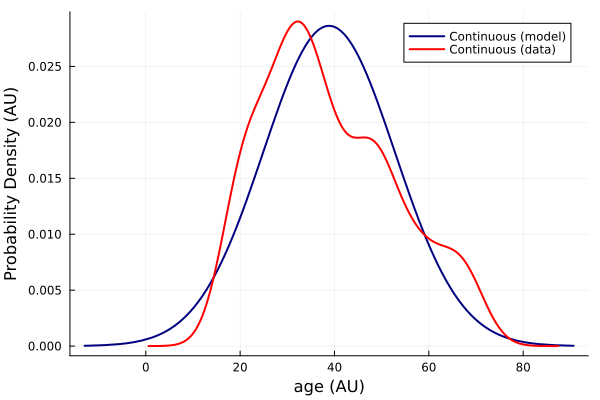

In [98]:
let
    data = dataset[:,field_to_look_at]; # Get the data for your field
    plot(d‚ÇÅ, c=:navy, lw=2, label="Continuous (model)")
    density!(data, c=:red, lw=2, label="Continuous (data)")
    xlabel!("$(String(field_to_look_at)) (AU)", fontsize = 18);
    ylabel!("Probability Density (AU)", fontsize=18)
end

Is the mean and standard deviation $(\mu,\sigma)$ the same between the model and the data?

In [100]:
let

    # initialize -
    data = dataset[:,field_to_look_at]; # Get the data for your field
    
    Œº = mean(d‚ÇÅ); # what is the mean
    ŒºÃÑ = mean(data); # what is the data mean?
    œÉ = std(d‚ÇÅ);
    œÉÃÑ = std(data);
    println("Model (Œº,œÉ)=($(Œº),$(œÉ)) versus data (ŒºÃÑ,œÉÃÑ)=($(ŒºÃÑ),$(œÉÃÑ))")
end

Model (Œº,œÉ)=(38.85,13.934041050606966) versus data (ŒºÃÑ,œÉÃÑ)=(38.85,13.969007331558881)


__Discrete model__: Next, let's do a super cool, super hack! To estimate the [probability mass function (PMF)](https://en.wikipedia.org/wiki/Probability_mass_function) of the data, let's calculate the _count_ of each value in the range of the data corresponding to the `field_to_look_at::Symbol` field, and then use the normalized count array (which approximates a probability vector $p$) to initialize [a Categorical distribution, i.e., a generalized Bernoulli distribution](https://en.wikipedia.org/wiki/Categorical_distribution)

We'll save the data-driven PMF in the `d‚ÇÇ::Categorical{Float64, Vector{Float64}}` variable:

In [122]:
d‚ÇÇ, y, p = let

    d = nothing;
    data = dataset[:,field_to_look_at]; # Get the data for your field
    number_of_records = nrow(dataset); # how many total records?
    L = minimum(data);
    U = maximum(data);
    supportvector = range(L, stop=U, step=1) |> collect;
    number_of_support_values = length(supportvector);
    y = Array{Int64,1}(undef,number_of_support_values); 
    
    for i ‚àà eachindex(supportvector)
        x = supportvector[i]; # what value are we looking at?
        y[i] = filter(y-> y == x, data) |> v -> length(v); # hmmm. That's fancy, see above for a description.
    end
    
    # Compute the probability from the frequency -
    total = sum(y);
    p = y/total;
    d = Categorical(p)
    d, y, p
end;

In [143]:
p[15], y[15]/sum(y)

(0.055, 0.055)

`Unhide` the code block below to see what we plotted the PMF of the data in the `field_to_look_at::Symbol` field.
* __Summary__: The PMF plot shows a couple of interesting things. The most probable values are not the mean of the continuous model; instead, there are typically only a few (depending upon the field we are looking at) highly probable values, with many low-probability data points. Thus, the data is not evenly spread through the possible range.

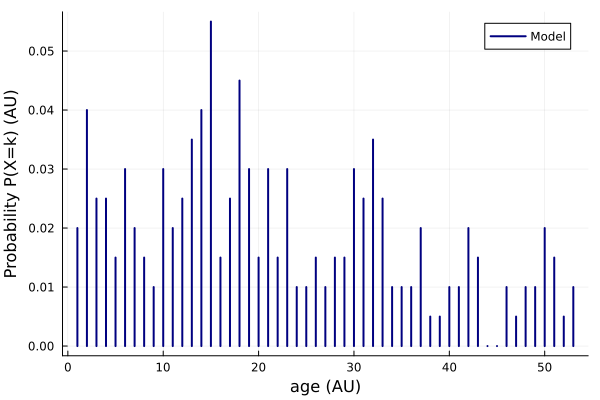

In [124]:
let
    plot(d‚ÇÇ, lw=2, c=:navy, label="Model")
    xlabel!("$(String(field_to_look_at)) (AU)", fontsize = 18);
    ylabel!("Probability P(X=k) (AU)", fontsize=18)
end

I'm curious. For the LOLs, let's compute the expectation of the discrete model and see how well it compares to its continuous analog. The same or different?

In [107]:
let
    data = dataset[:,field_to_look_at]; # Get the data for your field
    number_of_records = nrow(dataset); # how many total records?
    L = minimum(data);
    U = maximum(data);
    supportvector = range(L, stop=U, step=1) |> collect;
    p = params(d‚ÇÇ)[1]; # this gives the probability vector
    ùîº  = dot(p,supportvector); # compute the expectation

    println("Expectation: ùîº(x) = $(ùîº)")
end

Expectation: ùîº(x) = 38.85
